In [1]:
import pandas as pd
#Open ths csv file in read mode
with open('/content/v5_20230409_090939_206m.csv', mode='r')as file:
  df_206=pd.read_csv(file,sep=',')
#print the first five rows of the data
print(df_206.head(5))

                  Timestamp  accelX(g)  accelY(g)  accelZ(g)  accelUserX(g)  \
0  09-Apr-2023 09:09:39.979    -0.0725    -0.9272    -0.7220        -0.0473   
1  09-Apr-2023 09:09:39.981    -0.0725    -0.9272    -0.7220        -0.0249   
2  09-Apr-2023 09:09:39.981    -0.0725    -0.9272    -0.7220        -0.0249   
3  09-Apr-2023 09:09:39.985     0.0197    -1.0018    -0.5080        -0.0239   
4  09-Apr-2023 09:09:39.996     0.1890    -1.0938    -0.3944         0.1304   

   accelUserY(g)  accelUserZ(g)  gyroX(rad/s)  gyroY(rad/s)  gyroZ(rad/s)  \
0         0.0011        -0.4685       -0.3570        0.0006       -0.3407   
1        -0.0319        -0.2194        0.6848       -0.6088       -0.1956   
2        -0.0319        -0.2194        0.6848       -0.6088       -0.1956   
3        -0.0306        -0.2227        0.6996       -0.8581       -0.0679   
4        -0.1245        -0.0687        0.6565       -1.0381        0.1358   

   ...  ActivityType  ActivityConfidence  Pressure(kilopascals

In [2]:
# Remove duplicate rows
df_206 = df_206.drop_duplicates()

# Verify that duplicates are removed
print("DataFrame after removing duplicates:")
print(df_206.head())

DataFrame after removing duplicates:
                  Timestamp  accelX(g)  accelY(g)  accelZ(g)  accelUserX(g)  \
0  09-Apr-2023 09:09:39.979    -0.0725    -0.9272    -0.7220        -0.0473   
1  09-Apr-2023 09:09:39.981    -0.0725    -0.9272    -0.7220        -0.0249   
2  09-Apr-2023 09:09:39.981    -0.0725    -0.9272    -0.7220        -0.0249   
3  09-Apr-2023 09:09:39.985     0.0197    -1.0018    -0.5080        -0.0239   
4  09-Apr-2023 09:09:39.996     0.1890    -1.0938    -0.3944         0.1304   

   accelUserY(g)  accelUserZ(g)  gyroX(rad/s)  gyroY(rad/s)  gyroZ(rad/s)  \
0         0.0011        -0.4685       -0.3570        0.0006       -0.3407   
1        -0.0319        -0.2194        0.6848       -0.6088       -0.1956   
2        -0.0319        -0.2194        0.6848       -0.6088       -0.1956   
3        -0.0306        -0.2227        0.6996       -0.8581       -0.0679   
4        -0.1245        -0.0687        0.6565       -1.0381        0.1358   

   ...  ActivityType  Act

In [3]:
# Convert 'Timestamp' column to datetime
df_206['Timestamp'] = pd.to_datetime(df_206['Timestamp'])

# Verify the changes
print(df_206.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232364 entries, 0 to 1232546
Data columns (total 44 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Timestamp                 1232364 non-null  datetime64[ns]
 1   accelX(g)                 1232364 non-null  float64       
 2   accelY(g)                 1232364 non-null  float64       
 3   accelZ(g)                 1232364 non-null  float64       
 4   accelUserX(g)             1232364 non-null  float64       
 5   accelUserY(g)             1232364 non-null  float64       
 6   accelUserZ(g)             1232364 non-null  float64       
 7   gyroX(rad/s)              1232364 non-null  float64       
 8   gyroY(rad/s)              1232364 non-null  float64       
 9   gyroZ(rad/s)              1232364 non-null  float64       
 10  Roll(rads)                1232364 non-null  float64       
 11  Pitch(rads)               1232363 non-null  float6

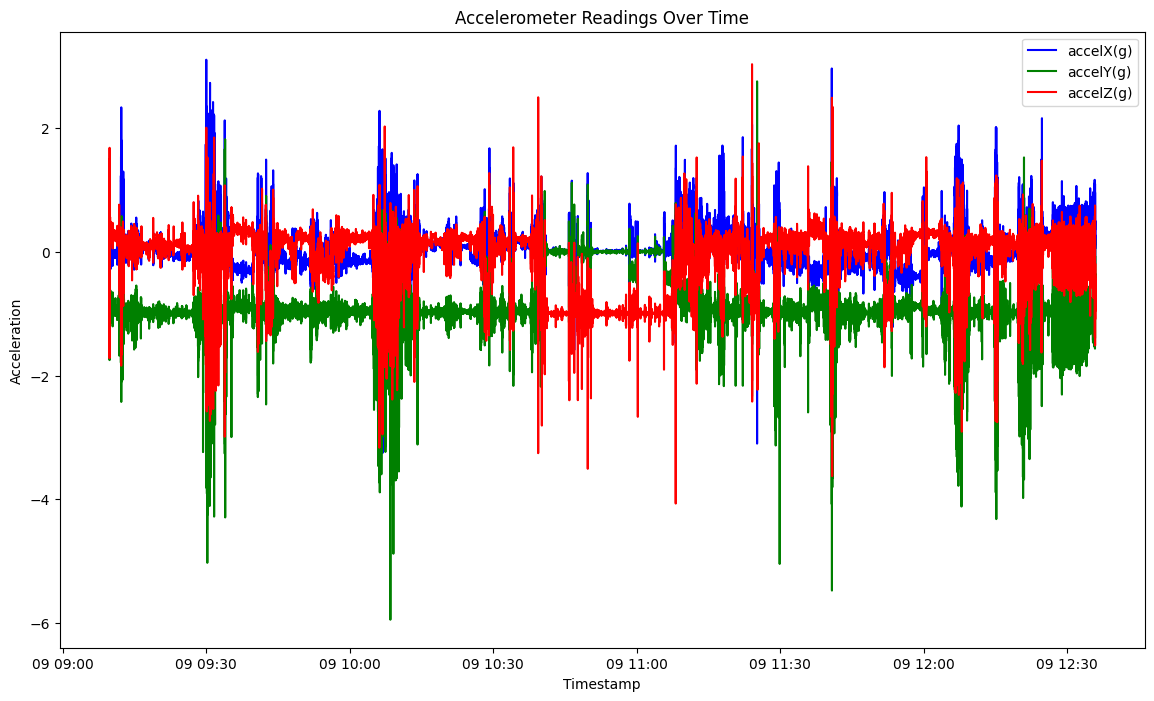

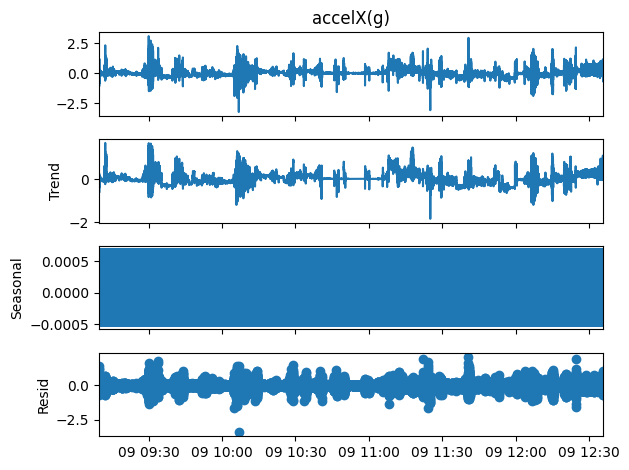

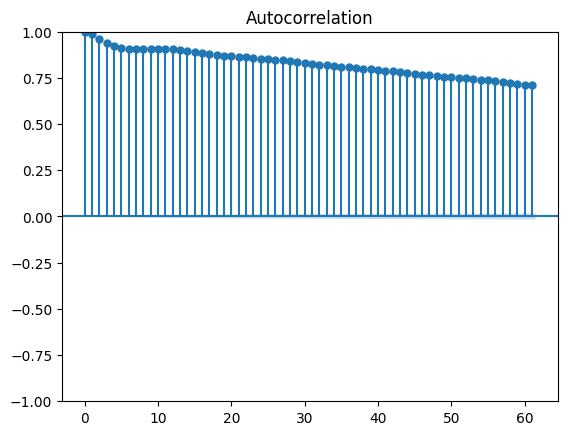

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'Timestamp' is the name of your timestamp column
df_206['Timestamp'] = pd.to_datetime(df_206['Timestamp'])
df_206.set_index('Timestamp', inplace=True)

# Plot the accelerometer readings over time
plt.figure(figsize=(14, 8))
plt.plot(df_206['accelX(g)'], label='accelX(g)', color='blue')
plt.plot(df_206['accelY(g)'], label='accelY(g)', color='green')
plt.plot(df_206['accelZ(g)'], label='accelZ(g)', color='red')
plt.title('Accelerometer Readings Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df_206['accelX(g)'], model='additive', period=30)  # Adjust 'period' based on your data
result.plot()
plt.show()

# Plot autocorrelation function (ACF)
plot_acf(df_206['accelX(g)'])
plt.show()

# Time series forecasting using Exponential Smoothing
train_size = int(len(df_206['accelX(g)']) * 0.8)
train, test = df_206['accelX(g)'][:train_size], df_206['accelX(g)'][train_size:]

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=30)  # Adjust 'seasonal_periods' based on your data
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=test.index[0], end=test.index[-1])

# Plot the actual vs. predicted values
plt.figure(figsize=(14, 8))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(predictions.index, predictions, label='Predicted Data', color='red')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

In [ ]:
pip install statsmodels
pip install pmdarima
pip install fbprophet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from fbprophet import Prophet

# Assuming 'Timestamp' is the name of your timestamp column
df_206['Timestamp'] = pd.to_datetime(df_206['Timestamp'])
df_206.set_index('Timestamp', inplace=True)

# Plot the accelerometer readings over time
plt.figure(figsize=(14, 8))
plt.plot(df_206['accelX(g)'], label='accelX(g)', color='blue')
plt.plot(df_206['accelY(g)'], label='accelY(g)', color='green')
plt.plot(df_206['accelZ(g)'], label='accelZ(g)', color='red')
plt.title('Accelerometer Readings Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend()
plt.show()

# Auto ARIMA to find the best parameters
autoarima_model = auto_arima(df_206['accelX(g)'], seasonal=True, m=30)  # Adjust 'm' based on your data

# SARIMA model
sarima_order = (1, 1, 1)  # Adjust based on auto_arima results
sarima_seasonal_order = (1, 1, 1, 30)  # Adjust based on auto_arima results
sarima_model = SARIMAX(df_206['accelX(g)'], order=sarima_order, seasonal_order=sarima_seasonal_order)
sarima_fit = sarima_model.fit()

# Prophet model
prophet_df = df_206.reset_index()[['Timestamp', 'accelX(g)']].rename(columns={'Timestamp': 'ds', 'accelX(g)': 'y'})
prophet_model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False)
prophet_model.add_seasonality(name='daily', period=30, fourier_order=5)  # Adjust 'period' based on your data
prophet_fit = prophet_model.fit(prophet_df)

# Future DataFrame for Prophet
future = prophet_model.make_future_dataframe(periods=365)  # Adjust 'periods' based on your forecasting needs

# Predictions
autoarima_forecast = autoarima_model.predict(n_periods=len(df_206))
sarima_forecast = sarima_fit.get_forecast(steps=len(df_206))
prophet_forecast = prophet_fit.predict(future)

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(df_206.index, df_206['accelX(g)'], label='Actual', color='blue')
plt.plot(df_206.index, autoarima_forecast, label='AutoARIMA Forecast', color='green')
plt.plot(df_206.index, sarima_forecast.predicted_mean, label='SARIMA Forecast', color='orange')
plt.plot(prophet_df['ds'], prophet_forecast['yhat'], label='Prophet Forecast', color='red')
plt.title('Time Series Forecasting')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.legend()
plt.show()